In [2]:
import torch
from torch import nn
from torch import optim

In [3]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
X,y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [4]:
# hidden layers 5개
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [5]:
model = XOR()
model

XOR(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=2, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=2, out_features=2, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=2, out_features=2, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=2, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [8]:
def train(x, y, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad()

        # forward
        hypothesis = model(x)

        # check loss
        error = loss_fn(hypothesis, y)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()

        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')

In [12]:
train(X, y, epochs=10000, lr=0.01, optimizer='Adam', model=model, every_print=1000)
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.004637928679585457
Epoch: 2000, loss: 0.0012940652668476105
Epoch: 3000, loss: 0.0005670603131875396
Epoch: 4000, loss: 0.0002909837930928916
Epoch: 5000, loss: 0.00016087990661617368
Epoch: 6000, loss: 9.252912423107773e-05
Epoch: 7000, loss: 5.439734013634734e-05
Epoch: 8000, loss: 3.241356898797676e-05
Epoch: 9000, loss: 1.945796248037368e-05
Epoch: 10000, loss: 1.1715609616658185e-05


(tensor([[1.1839e-05],
         [9.9999e-01],
         [9.9999e-01],
         [1.1646e-05]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [13]:
for x in model.named_parameters():
    print(x)

('model.0.weight', Parameter containing:
tensor([[-6.1971,  7.7637],
        [ 2.8193, -4.9432]], requires_grad=True))
('model.0.bias', Parameter containing:
tensor([-5.9793,  0.4553], requires_grad=True))
('model.2.weight', Parameter containing:
tensor([[-5.2246, -3.3166],
        [-4.9951, -3.9336]], requires_grad=True))
('model.2.bias', Parameter containing:
tensor([2.1632, 2.6653], requires_grad=True))
('model.4.weight', Parameter containing:
tensor([[ 4.9992,  5.4489],
        [-5.2453, -5.6580]], requires_grad=True))
('model.4.bias', Parameter containing:
tensor([-4.0145,  4.1987], requires_grad=True))
('model.6.weight', Parameter containing:
tensor([[-5.7084,  5.1748],
        [-4.9997,  5.9229]], requires_grad=True))
('model.6.bias', Parameter containing:
tensor([ 0.1955, -0.5327], requires_grad=True))
('model.8.weight', Parameter containing:
tensor([[ 6.3776,  6.0508],
        [-6.3812, -5.9339]], requires_grad=True))
('model.8.bias', Parameter containing:
tensor([-5.8751,  5.

**최종 출력값 및 그래프**

In [14]:
import torch
import torch.nn as nn

# 주어진 파라미터
w0 = torch.tensor([[-6.1971,  7.7637], [ 2.8193, -4.9432]])
b0 = torch.tensor([-5.9793,  0.4553])
w2 = torch.tensor([[-5.2246, -3.3166], [-4.9951, -3.9336]])
b2 = torch.tensor([2.1632, 2.6653])
w4 = torch.tensor([[ 4.9992,  5.4489], [-5.2453, -5.6580]])
b4 = torch.tensor([-4.0145,  4.1987])
w6 = torch.tensor([[-5.7084,  5.1748], [-4.9997,  5.9229]])
b6 =  torch.tensor([ 0.1955, -0.5327])
w8 = torch.tensor([[ 6.3776,  6.0508], [-6.3812, -5.9339]])
b8 = torch.tensor([-5.8751,  5.6763])
w10 = torch.tensor([[ 11.3377, -11.4957]])
b10 = torch.tensor([0.0604])

# 입력 데이터
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

sigmoid = nn.Sigmoid()

# 첫 번째 은닉층의 출력 계산
layer1_output = sigmoid(X @ w0.T + b0)

# 두 번째 은닉층의 출력 계산
layer2_output = sigmoid(layer1_output @ w2.T + b2)

# 세 번째 은닉층의 출력 계산
layer3_output = sigmoid(layer2_output @ w4.T + b4)

# 네 번째 은닉층의 출력 계산
layer4_output = sigmoid(layer3_output @ w6.T + b6)

# 다섯 번째 은닉층의 출력 계산
layer5_output = sigmoid(layer4_output @ w8.T + b8)

# 최종 출력 계산
final_output = sigmoid(layer5_output @ w10.T + b10)
print(final_output)

tensor([[1.1840e-05],
        [9.9999e-01],
        [9.9999e-01],
        [1.1647e-05]])


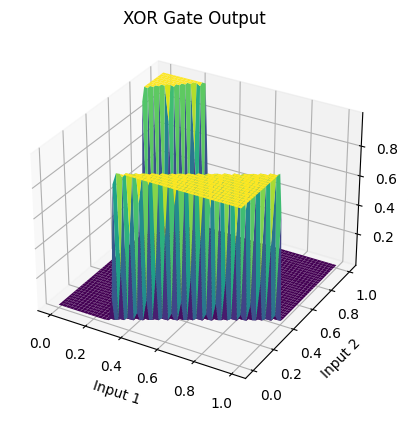

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XOR 게이트를 위한 입력 데이터 정의
x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 2)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.layer4 = torch.nn.Linear(2, 2)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.layer5 = torch.nn.Linear(2, 2)
        self.sigmoid5 = torch.nn.Sigmoid()
        self.layer6 = torch.nn.Linear(2, 1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        out = self.layer4(out)
        out = self.sigmoid4(out)
        out = self.layer5(out)
        out = self.sigmoid5(out)
        out = self.layer6(out)
        return torch.sigmoid(out)

xor_model = XOR()

# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[-6.1971,  7.7637], [ 2.8193, -4.9432]])
xor_model.layer1.bias.data = torch.tensor([-5.9793,  0.4553])
xor_model.layer2.weight.data = torch.tensor([[-5.2246, -3.3166], [-4.9951, -3.9336]])
xor_model.layer2.bias.data = torch.tensor([2.1632, 2.6653])
xor_model.layer3.weight.data = torch.tensor([[ 4.9992,  5.4489], [-5.2453, -5.6580]])
xor_model.layer3.bias.data = torch.tensor([-4.0145,  4.1987])
xor_model.layer4.weight.data = torch.tensor([[-5.7084,  5.1748], [-4.9997,  5.9229]])
xor_model.layer4.bias.data = torch.tensor([0.1955, -0.5327])
xor_model.layer5.weight.data = torch.tensor([[ 6.3776,  6.0508], [-6.3812, -5.9339]])
xor_model.layer5.bias.data = torch.tensor([-5.8751,  5.6763])
xor_model.layer6.weight.data = torch.tensor([[11.3377, -11.4957]])
xor_model.layer6.bias.data = torch.tensor([0.0604])

# 3차원 그래프 생성을 위한 입력 데이터 정의
x_values_xor = np.linspace(0, 1, 50)
y_values_xor = np.linspace(0, 1, 50)
xx_xor, yy_xor = np.meshgrid(x_values_xor, y_values_xor)
xy_xor = np.column_stack([xx_xor.ravel(), yy_xor.ravel()])
xy_tensor_xor = torch.tensor(xy_xor, dtype=torch.float)

# 각 점에서의 예측값 계산
with torch.no_grad():
    predictions_xor = xor_model(xy_tensor_xor).numpy().squeeze()  # Fix: Add .squeeze()

# 면 그래프로 출력 시각화
fig = plt.figure()
ax_xor = fig.add_subplot(111, projection='3d')
ax_xor.plot_surface(xx_xor, yy_xor, predictions_xor.reshape(xx_xor.shape), cmap='viridis')  # Fix: Reshape predictions_xor

ax_xor.set_xlabel('Input 1')
ax_xor.set_ylabel('Input 2')
ax_xor.set_zlabel('Output')
ax_xor.set_title('XOR Gate Output')
plt.show()


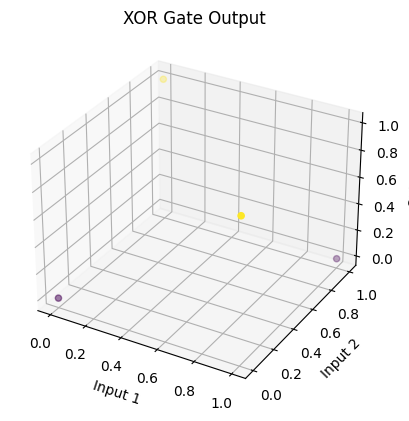

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XOR 게이트를 위한 입력 데이터 정의
x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 2)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.layer4 = torch.nn.Linear(2, 2)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.layer5 = torch.nn.Linear(2, 2)
        self.sigmoid5 = torch.nn.Sigmoid()
        self.layer6 = torch.nn.Linear(2, 1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        out = self.layer4(out)
        out = self.sigmoid4(out)
        out = self.layer5(out)
        out = self.sigmoid5(out)
        out = self.layer6(out)
        return torch.sigmoid(out)

xor_model = XOR()

# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[-6.1971,  7.7637], [ 2.8193, -4.9432]])
xor_model.layer1.bias.data = torch.tensor([-5.9793,  0.4553])
xor_model.layer2.weight.data = torch.tensor([[-5.2246, -3.3166], [-4.9951, -3.9336]])
xor_model.layer2.bias.data = torch.tensor([2.1632, 2.6653])
xor_model.layer3.weight.data = torch.tensor([[ 4.9992,  5.4489], [-5.2453, -5.6580]])
xor_model.layer3.bias.data = torch.tensor([-4.0145,  4.1987])
xor_model.layer4.weight.data = torch.tensor([[-5.7084,  5.1748], [-4.9997,  5.9229]])
xor_model.layer4.bias.data = torch.tensor([0.1955, -0.5327])
xor_model.layer5.weight.data = torch.tensor([[ 6.3776,  6.0508], [-6.3812, -5.9339]])
xor_model.layer5.bias.data = torch.tensor([-5.8751,  5.6763])
xor_model.layer6.weight.data = torch.tensor([[11.3377, -11.4957]])
xor_model.layer6.bias.data = torch.tensor([0.0604])

# 각 입력 값에 대한 모델의 출력 계산
with torch.no_grad():
    outputs = xor_model(x_xor).squeeze().numpy()

# 입력 값과 출력 값의 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_xor[:, 0], x_xor[:, 1], outputs, c=outputs, cmap='viridis')

ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Output')
ax.set_title('XOR Gate Output')
plt.show()
